In [1]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('wdbc.csv') 

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
 df.shape

(569, 33)

In [5]:
#Scaling data using MinMaxScaler between 0 and 1
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1))

cols = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
        'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
        'compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
        'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
        'symmetry_worst','fractal_dimension_worst']

df_scaled =scaler.fit_transform(df[cols])

df_scaled = pd.DataFrame(df_scaled,columns= cols)

In [6]:
df_scaled

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.792037        0.703140             0.731113       0.686364   
1            0.181768        0.203608             0.348757       0.379798   
2            0.431017        0.462512             0.635686       0.509596   
3            0.811361        0.565604             0.522863       0.776263   
4            0.347893        0.463918             0.518390       0.378283   
..                ...             ...                  ...            ...   
564          0.296055        0.571462             0.690358       0.336364   
565          0.257714        0.337395             0.486630       0.349495   
566          0.254340        0.216753             0.263519       0.267677   
567          0.790197        0.823336             0.755467       0.675253   
568          0.074351        0.000000             0.000000       0.266162   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.605518  ...      0.620776       0.141525   
1                  0.141323  ...      0.606901       0.303571   
2                  0.211247  ...      0.556386       0.360075   
3                  1.000000  ...      0.248310       0.385928   
4                  0.186816  ...      0.519744       0.123934   
..                      ...  ...           ...            ...   
564                0.132056  ...      0.623266       0.383262   
565                0.113100  ...      0.560655       0.699094   
566                0.137321  ...      0.393099       0.589019   
567                0.425442  ...      0.633582       0.730277   
568                0.187026  ...      0.054287       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.668310    0.450698          0.601136           0.619292   
1           0.539818    0.435214          0.347553           0.154563   
2           0.508442    0.374508          0.483590           0.385375   
3           0.241347    0.094008          0.915472           0.814012   
4           0.506948    0.341575          0.437364           0.172415   
..               ...         ...               ...                ...   
564         0.576174    0.452664          0.461137           0.178527   
565         0.520892    0.379915          0.300007           0.159997   
566         0.379949    0.230731          0.282177           0.273705   
567         0.668310    0.402035          0.619626           0.815758   
568         0.043578    0.020497          0.124084           0.036043   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.568610              0.912027        0.598462   
1           0.192971              0.639175        0.233590   
2           0.359744              0.835052        0.403706   
3           0.548642              0.884880        1.000000   
4           0.319489              0.558419        0.157500   
..               ...                   ...             ...   
564         0.328035              0.761512        0

In [7]:
#For Federated Part
#Horizontal Partinioning of data 
#scaled data 
#Run once only and we save the partioned datasets that we get

df_f = df_scaled.sample(frac=1) #shuffle the data to remove any possible order
df1 = df_f[:int(len(df)/2)]   #take half for data node 1 which is half of the size of the original dataframe
df1.to_csv('bcdata1scaledn.csv', index=False)

df2 = df_f[int(len(df)/2):]   # take half for data node 2 which is half of the size of the original dataframe
df2.to_csv('bcdata2scaledn.csv', index=False)

In [7]:
#Create dataframes of partition1 and partition2 datasets with diagnosis column
#Used for creating plot to see the distribution of both partitions  
df_partition1 = pd.read_csv('bcdata1scaledn.csv')
df_diagnosis = df["diagnosis"]
df_partition1_diagnosis = pd.concat([df_partition1, df_diagnosis.iloc[:int(len(df)/2)]], axis = 1) 
df_partition2 = pd.read_csv('bcdata2scaledn.csv')
df_partition2_diagnosis = pd.concat([df_partition2, df_diagnosis.iloc[:int(len(df)/2)]], axis = 1) 

In [8]:
df_partition1_diagnosis

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.640305      0.612107        0.626149   0.498621         0.351720   
1       0.590137      0.325330        0.571557   0.434995         0.459240   
2       0.169861      0.291173        0.159146   0.083733         0.259908   
3       0.368167      0.170105        0.352982   0.222778         0.326081   
4       0.187373      0.300304        0.183816   0.096076         0.431254   
..           ...           ...             ...        ...              ...   
279     0.353022      0.184985        0.346762   0.210647         0.424935   
280     0.239907      0.166385        0.236680   0.129714         0.455629   
281     0.572152      0.510653        0.583996   0.407423         0.344678   
282     0.246060      0.274941        0.234953   0.130477         0.468268   
283     0.335037      0.252621        0.317601   0.197497         0.251151   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.269983        0.364105             0.414513       0.195960   
1            0.304951        0.323102             0.426988       0.361616   
2            0.077419        0.046696             0.055219       0.662626   
3            0.179191        0.107966             0.175348       0.232828   
4            0.169376        0.115839             0.145726       0.215152   
..                ...             ...                  ...            ...   
279          0.253727        0.198852             0.274950       0.335354   
280          0.219434        0.154452             0.136630       0.310606   
281          0.612294        0.493674             0.495080       0.631313   
282          0.157015        0.058341             0.146173       0.424242   
283          0.104994        0.062816             0.161581       0.293434   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  0.125527  ...       0.675906         0.559241    0.414569   
1                  0.137110  ...       0.334488         0.561233    0.439147   
2                  0.162595  ...       0.300906         0.094327    0.044509   
3                  0.192923  ...       0.157516         0.317695    0.170959   
4                  0.340986  ...       0.361407         0.161114    0.070586   
..                      ...  ...            ...              ...         ...   
279                0.228517  ...       0.208689         0.289805    0.142966   
280                0.220514  ...       0.231343         0.196574    0.097670   
281                0.283698  ...       0.563699         0.632452    0.360254   
282                0.345198  ...       0.237207         0.158026    0.076190   
283                0.161752  ...       0.355011         0.229145    0.122714   

     smoothness_worst  compactness_worst  concavity_worst  \
0            0.337648           0.241397         0.331150   
1            0.518589           0.280205         0.344808   
2            0.176781           0.036994         0.031837   
3            0.335667           0.168437         0.171805   
4            0.430100           0.133025         0.112780   
..                ...                ...              ...   
279          0.399062           0.238874         0.247843   
280          0.516608           0.182699         0.243610   
281          0.353497           0.695744         0.578435   
282          0.282837           0.064315         0.039776   
283          0.233969           0.092955         0.067572   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                0.537113        0.171890                 0.185229          M  
1                0.686942        0.357579                 0.226026          M  
2                0.076357        0.223536                 0.080808          M  
3                0.429897        0.304356                 0.175981          M  
4                0.271031        0.135226        

In [9]:
df_partition2_diagnosis

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.155190      0.084883        0.151752   0.075546         0.427282   
1       0.298121      0.357457        0.300809   0.170392         0.464656   
2       0.587770      0.286439        0.576394   0.424814         0.461045   
3       0.319419      0.436253        0.344206   0.184433         0.545906   
4       0.412656      0.358471        0.396724   0.264305         0.391261   
..           ...           ...             ...        ...              ...   
280     0.357281      0.144403        0.346002   0.212386         0.517017   
281     0.137015      0.327697        0.139313   0.065663         0.432157   
282     0.287236      0.300304        0.285398   0.156310         0.501670   
283     0.522931      0.241461        0.509364   0.359067         0.332581   
284     0.477022      0.381806        0.469974   0.328780         0.535073   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.171891        0.045056             0.097813       0.373737   
1            0.381020        0.230717             0.306064       0.461616   
2            0.382860        0.380975             0.470378       0.420707   
3            0.643887        0.498594             0.398857       0.509596   
4            0.210447        0.154475             0.257903       0.281818   
..                ...             ...                  ...            ...   
280          0.224035        0.161551             0.322813       0.297980   
281          0.237992        0.144189             0.150547       0.446970   
282          0.340531        0.225000             0.278479       0.492424   
283          0.318447        0.255389             0.310835       0.333333   
284          0.264462        0.353327             0.493738       0.336869   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  0.331297  ...       0.096748         0.113651    0.051440   
1                  0.376158  ...       0.425906         0.312217    0.177448   
2                  0.188711  ...       0.443230         0.507944    0.354601   
3                  0.565712  ...       0.532783         0.290801    0.125959   
4                  0.116470  ...       0.554371         0.392898    0.266368   
..                      ...  ...            ...              ...         ...   
280                0.236942  ...       0.130864         0.262413    0.138788   
281                0.279275  ...       0.394723         0.108621    0.043256   
282                0.316976  ...       0.341951         0.218188    0.099784   
283                0.165122  ...       0.266525         0.412819    0.272021   
284                0.226411  ...       0.563166         0.462125    0.289225   

     smoothness_worst  compactness_worst  concavity_worst  \
0            0.416892           0.133607         0.068810   
1            0.540382           0.334827         0.292652   
2            0.532457           0.337253         0.344728   
3            0.620287           0.723006         0.554553   
4            0.463779           0.317655         0.231789   
..                ...                ...              ...   
280          0.419534           0.116919         0.109665   
281          0.559532           0.196864         0.211182   
282          0.416892           0.231404         0.205511   
283          0.364063           0.232180         0.342652   
284          0.486892           0.172706         0.313099   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                0.230103        0.270451                 0.145481          M  
1                0.512715        0.428543                 0.312607          M  
2                0.773883        0.399172                 0.149744          M  
3                0.758763        0.400355                 0.577594          M  
4                0.529553        0.369012        

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

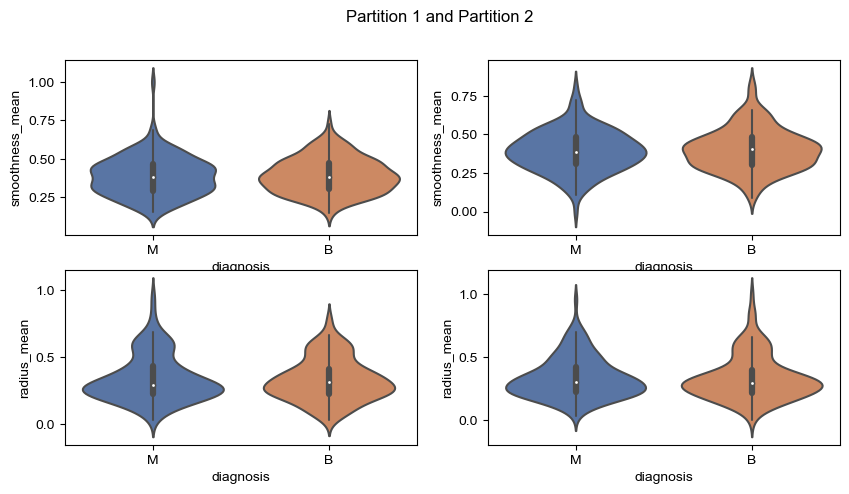

In [10]:
#To see the distribution of the partitioned datasets 
fig, axes = plt.subplots(2,2, figsize=(10,5))

fig.suptitle('Partition 1 and Partition 2')
sns.set(style='whitegrid')
sns.violinplot(ax=axes[0,0], x='diagnosis', y = "smoothness_mean", data = df_partition1_diagnosis)
sns.violinplot(ax=axes[0,1], x='diagnosis', y = "smoothness_mean", data = df_partition2_diagnosis)
sns.violinplot(ax=axes[1,0], x='diagnosis', y = "radius_mean", data = df_partition1_diagnosis)
sns.violinplot(ax=axes[1,1], x='diagnosis', y = "radius_mean", data = df_partition2_diagnosis)


In [4]:
#To check if missing values exist in dataframe
df.isna().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Data Analysis

In [7]:
#drop last column with Nan Values
df.drop('Unnamed: 32',axis=1,inplace= True) 

In [ ]:
#Visualizing data 
#Reference: https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd

#Visualizing using pairplots
sns.set_style("whitegrid")
sns.pairplot(df,hue= "diagnosis",height = 2)
plt.show()

In [8]:
#Drop the id column 
df.drop('id', axis=1, inplace= True)

C:\Users\sanchi.bhalla\AppData\Local\Temp\ipykernel_12588\1871602279.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)


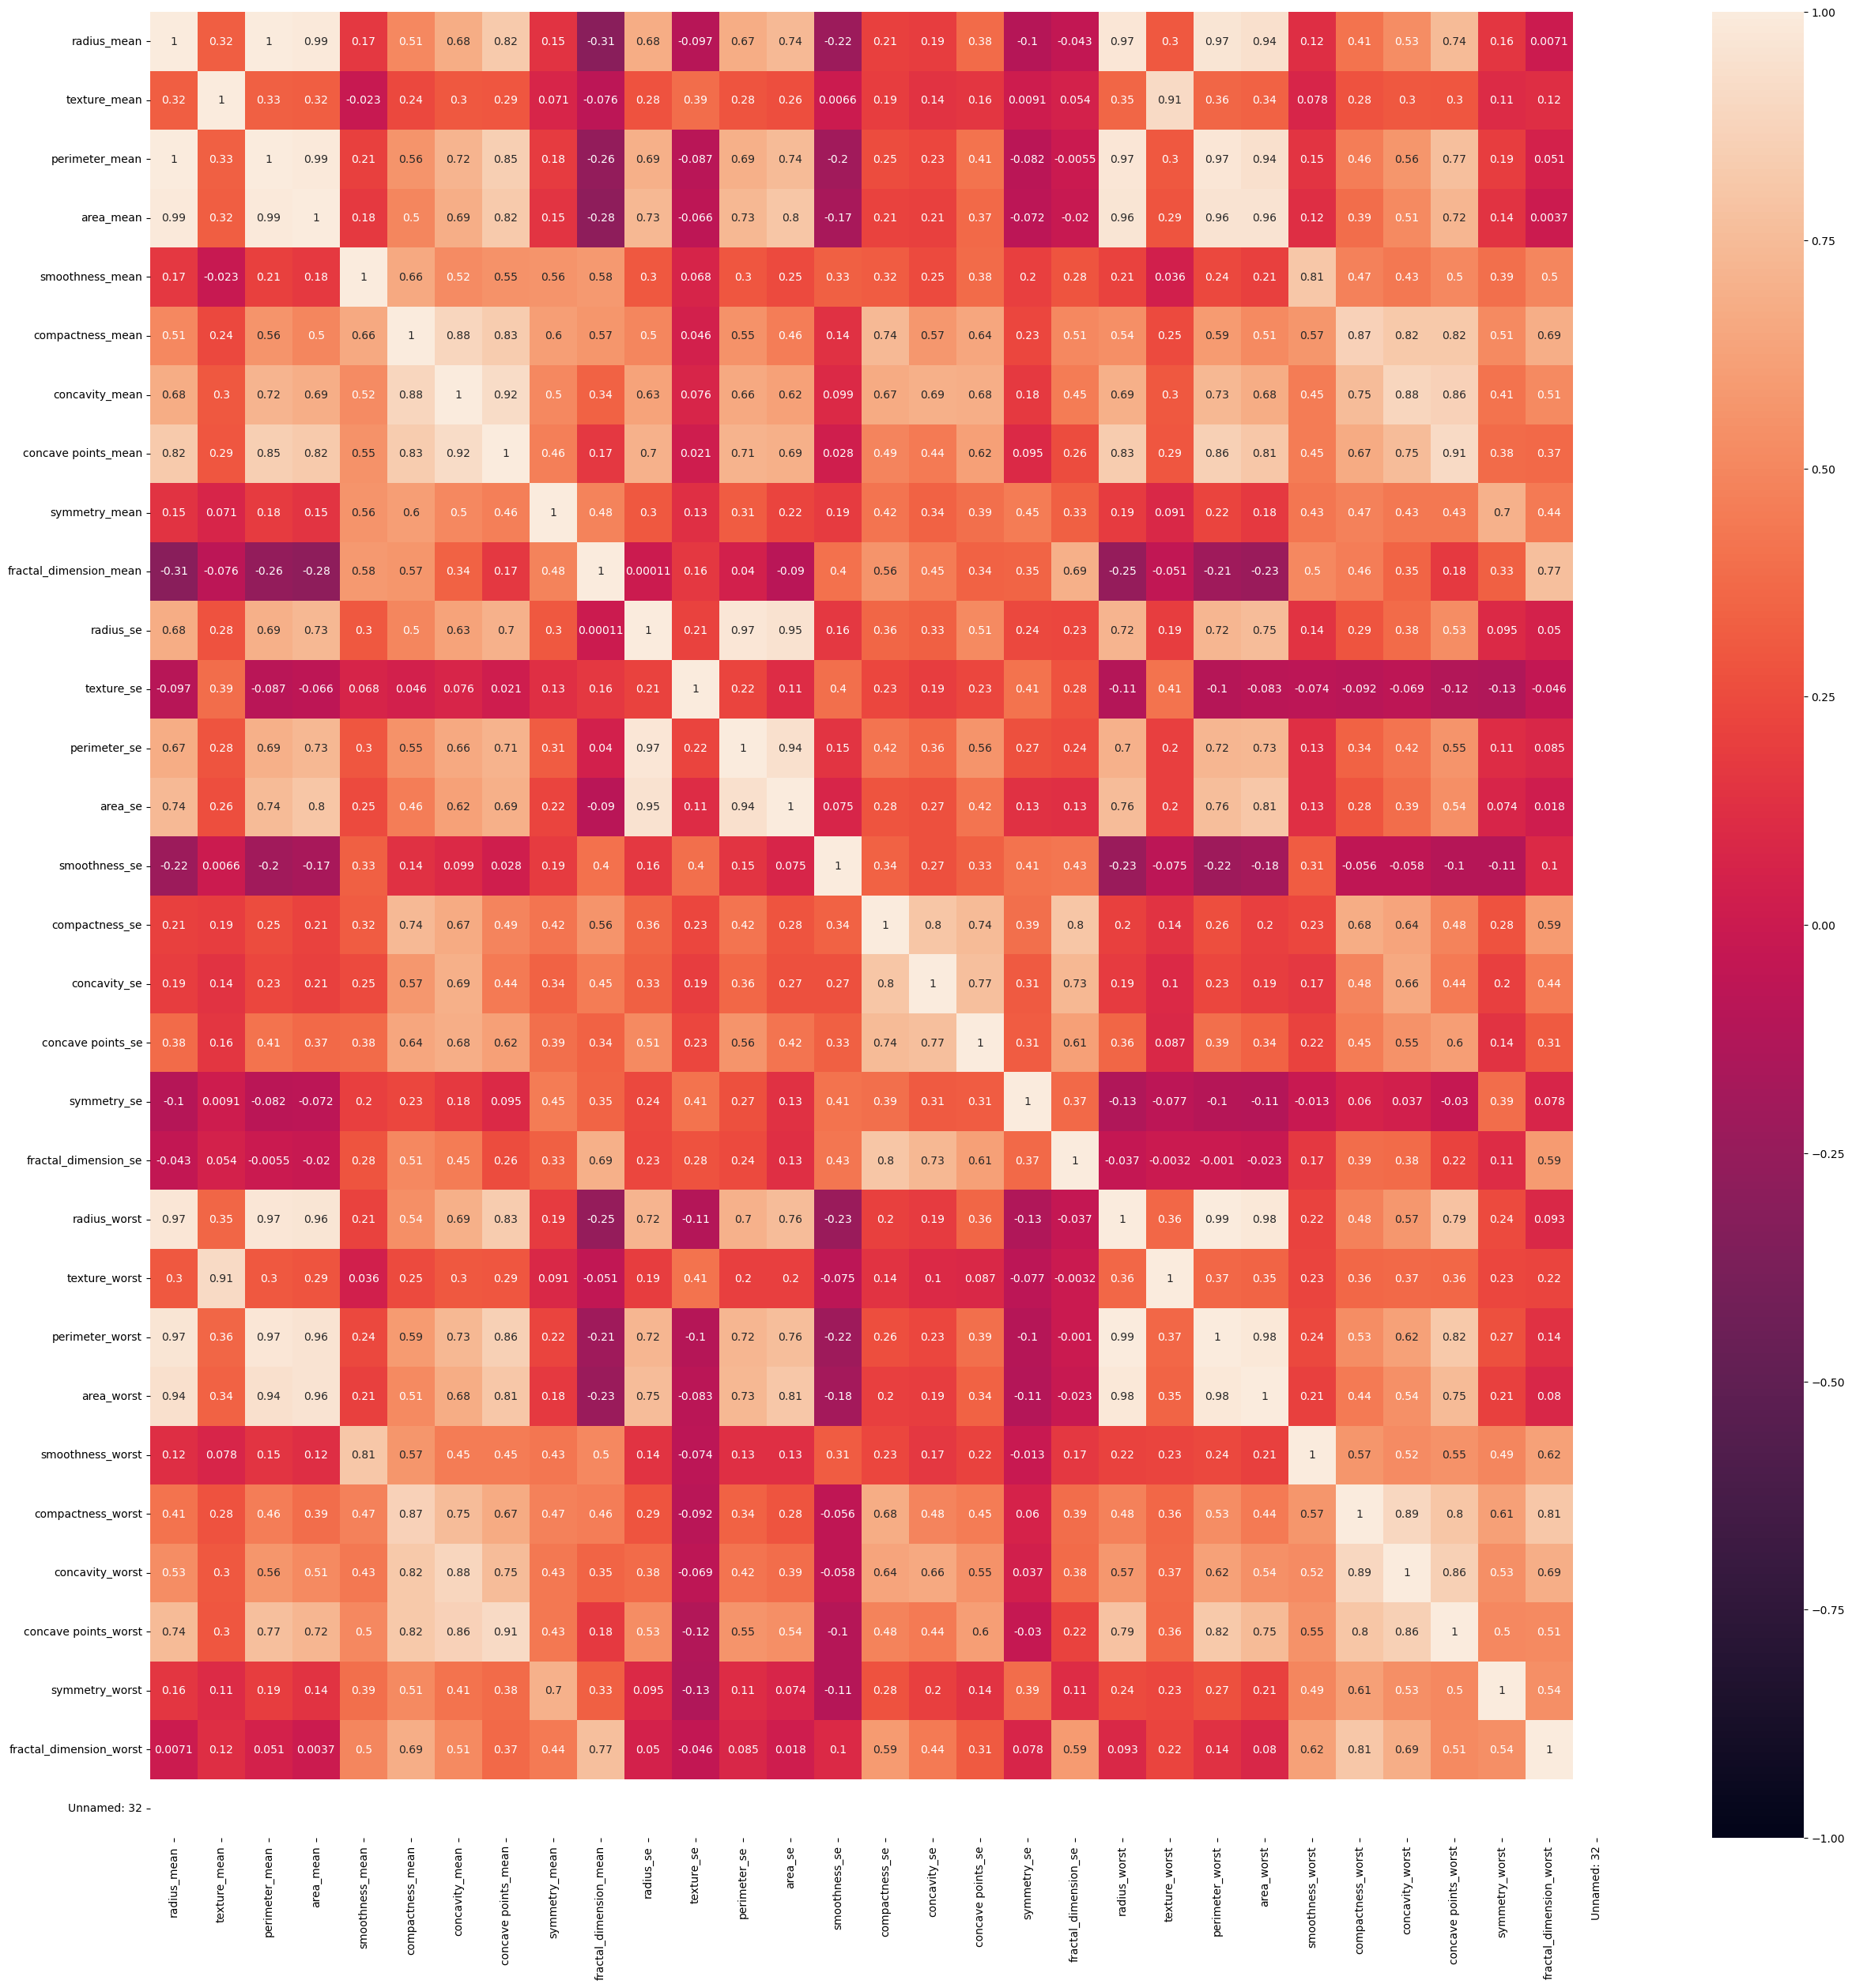

In [8]:
#Correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

radius_mean is signifigantly correlated with area_mean, perimeter_mean, concavity_mean,
concave points_mean and compactness_mean


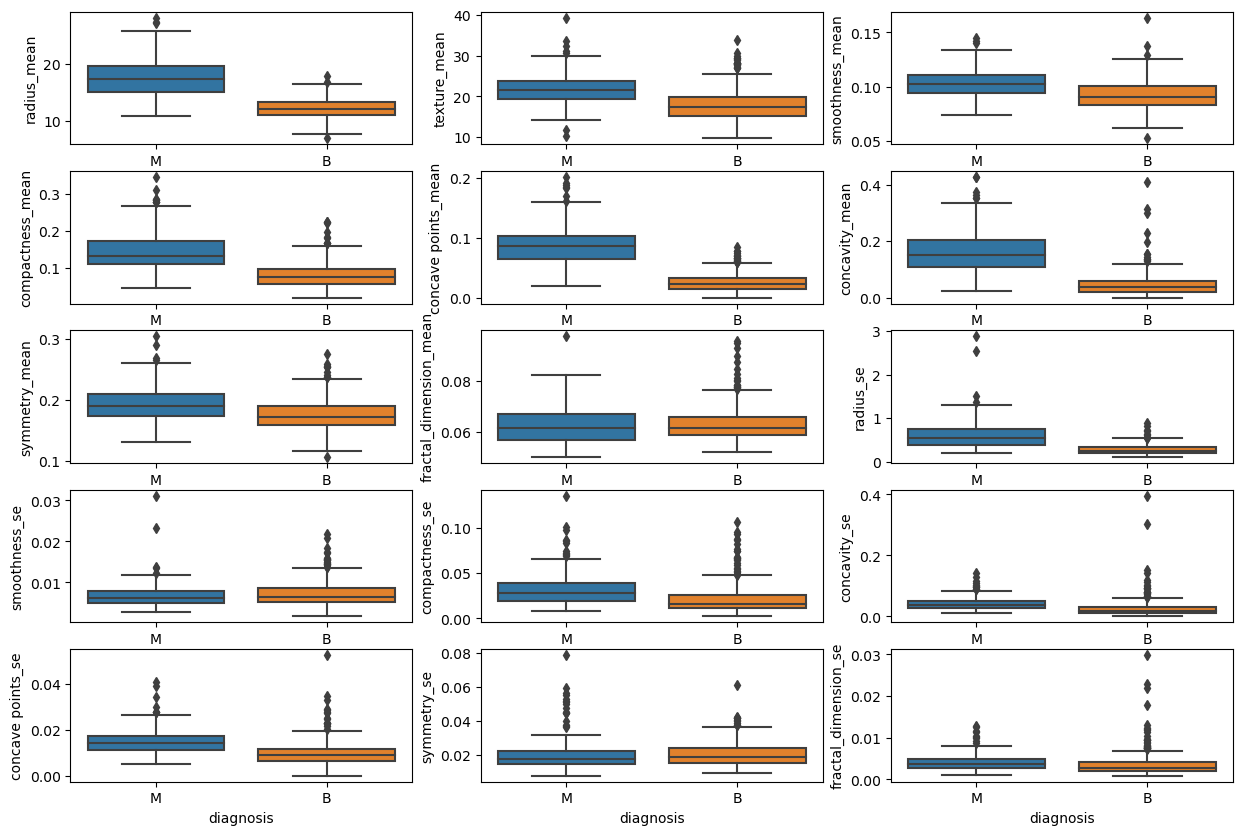

In [9]:
#Visulaizing each feature with diagnosis using boxplot
fig, axes = plt.subplots(5,3, figsize=(15,10))

fig.suptitle('')

sns.boxplot(ax= axes[0,0],x="diagnosis",y="radius_mean",data=df)
sns.boxplot(ax= axes[0,1],x="diagnosis",y="texture_mean",data=df)
sns.boxplot(ax= axes[0,2],x="diagnosis",y="smoothness_mean",data=df)
sns.boxplot(ax= axes[1,0],x="diagnosis",y="compactness_mean",data=df)
sns.boxplot(ax= axes[1,1],x="diagnosis",y="concave points_mean",data=df)
sns.boxplot(ax= axes[1,2],x="diagnosis",y="concavity_mean",data=df)
sns.boxplot(ax= axes[2,0],x="diagnosis",y="symmetry_mean",data=df)
sns.boxplot(ax= axes[2,1],x="diagnosis",y="fractal_dimension_mean",data=df)
sns.boxplot(ax= axes[2,2],x="diagnosis",y="radius_se",data=df)
sns.boxplot(ax= axes[3,0],x="diagnosis",y="smoothness_se",data=df)
sns.boxplot(ax= axes[3,1],x="diagnosis",y="compactness_se",data=df)
sns.boxplot(ax= axes[3,2],x="diagnosis",y="concavity_se",data=df)
sns.boxplot(ax= axes[4,0],x="diagnosis",y="concave points_se",data=df)
sns.boxplot(ax= axes[4,1],x="diagnosis",y="symmetry_se",data=df)
sns.boxplot(ax= axes[4,2],x="diagnosis",y="fractal_dimension_se",data=df)
plt.show()

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_se'>

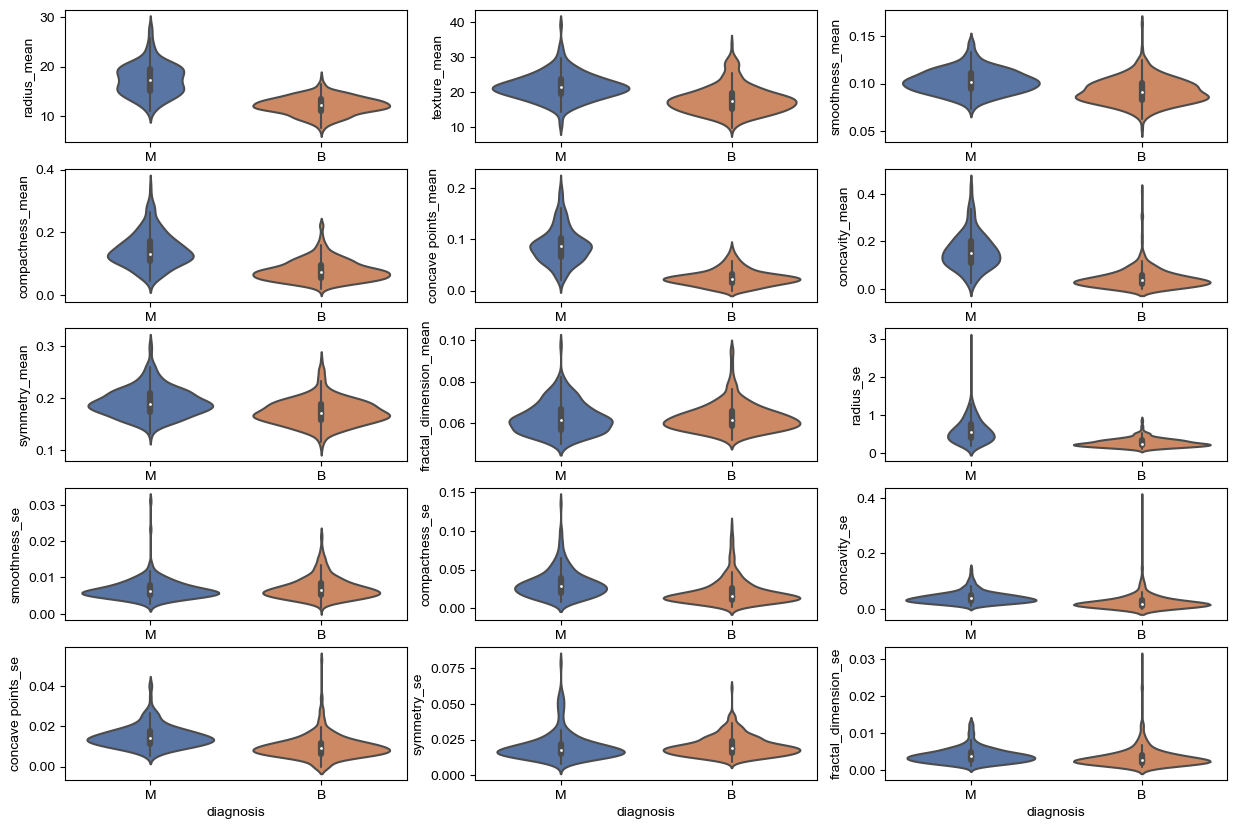

In [10]:
#Visulaizing each feature with diagnosis using Violin Plot
fig, axes = plt.subplots(5,3, figsize=(15,10))

fig.suptitle('')
sns.set(style='whitegrid')
sns.violinplot(ax= axes[0,0],x='diagnosis', y = "radius_mean", data = df)
sns.violinplot(ax= axes[0,1],x='diagnosis', y = "texture_mean", data = df)
sns.violinplot(ax= axes[0,2],x='diagnosis', y = "smoothness_mean", data = df)
sns.violinplot(ax= axes[1,0],x='diagnosis', y = "compactness_mean", data = df)
sns.violinplot(ax= axes[1,1],x='diagnosis', y = "concave points_mean", data = df)
sns.violinplot(ax= axes[1,2],x="diagnosis", y= "concavity_mean",data = df) 
sns.violinplot(ax= axes[2,0],x="diagnosis", y= "symmetry_mean",data= df)
sns.violinplot(ax= axes[2,1],x='diagnosis', y = "fractal_dimension_mean", data = df)
sns.violinplot(ax=axes[2,2], x="diagnosis", y="radius_se",data=df)
sns.violinplot(ax=axes[3,0], x= "diagnosis", y="smoothness_se",data=df)
sns.violinplot(ax=axes[3,1], x= "diagnosis", y="compactness_se",data=df),
sns.violinplot(ax=axes[3,2], x= "diagnosis", y="concavity_se",data=df)
sns.violinplot(ax=axes[4,0], x= "diagnosis", y="concave points_se",data=df)
sns.violinplot(ax=axes[4,1], x= "diagnosis", y="symmetry_se",data= df)
sns.violinplot(ax=axes[4,2], x="diagnosis", y="fractal_dimension_se", data=df)

In [9]:
df_scaled.shape

(569, 30)

In [9]:
#Taking in X only one of the correlated columns to reduce dimensions of the data
X = df_scaled[["radius_mean","texture_mean","smoothness_mean","compactness_mean","concave points_mean","fractal_dimension_mean"
        ,"concavity_mean","symmetry_mean","radius_se","texture_se","smoothness_se","concavity_se","concave points_se","symmetry_se"
        ,"fractal_dimension_se","symmetry_worst","fractal_dimension_worst"]]

In [12]:
X.shape

(569, 17)

Centralized KMeans Clustering

In [10]:
#Centralized Kmeans Clustering
#Reference:
#https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

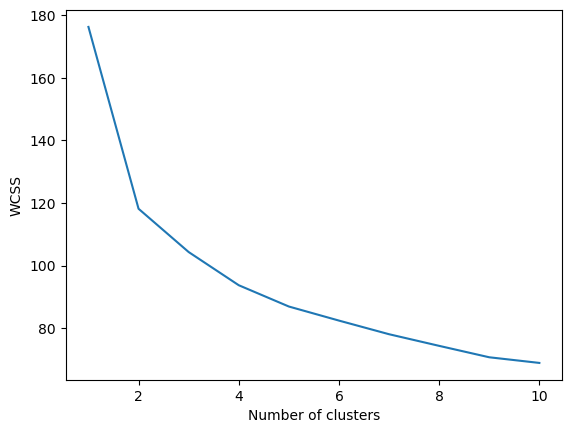

In [11]:
#Plot of sum of squared error calculate for each cluster 
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, init ='k-means++')
kmeans.fit(X)
X['cluster'] = kmeans.labels_ 
#clusters = kmeans.labels_

C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanchi.bhalla\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sanchi.bhalla\AppData\Local\Temp\ipykernel_1504\3760257913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


Text(0, 0.5, 'Count')

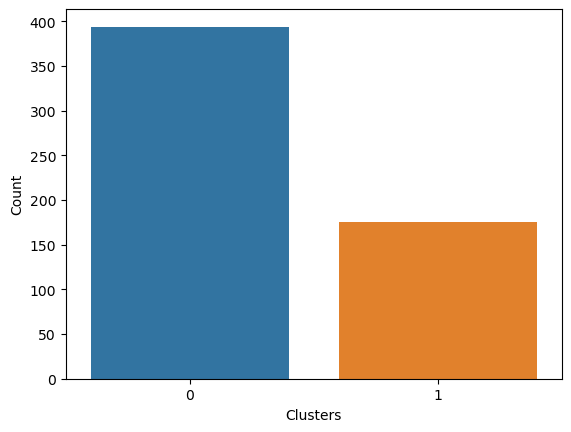

In [13]:
#countplot to know the distribution of the clusters obtained
sns.countplot(x = 'cluster', data = X)

plt.xlabel('Clusters')
plt.ylabel('Count')

In [15]:
#Location of centroids
#print(clusters.value_counts())
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

[[0.48010439 0.39144693 0.49183404 0.44705496 0.47317353 0.34751595
  0.43359673 0.48305339 0.19052399 0.20721244 0.20037102 0.1359733
  0.32548816 0.20864259 0.15629238 0.34490158 0.28278368]
 [0.27520311 0.29399223 0.35167877 0.17778447 0.14096328 0.23611812
  0.10788271 0.33365764 0.06895603 0.18137869 0.17256804 0.05591816
  0.17813427 0.16459688 0.07527563 0.22706555 0.14820564]]


In [16]:
centroids

array([[0.48010439, 0.39144693, 0.49183404, 0.44705496, 0.47317353,
        0.34751595, 0.43359673, 0.48305339, 0.19052399, 0.20721244,
        0.20037102, 0.1359733 , 0.32548816, 0.20864259, 0.15629238,
        0.34490158, 0.28278368],
       [0.27520311, 0.29399223, 0.35167877, 0.17778447, 0.14096328,
        0.23611812, 0.10788271, 0.33365764, 0.06895603, 0.18137869,
        0.17256804, 0.05591816, 0.17813427, 0.16459688, 0.07527563,
        0.22706555, 0.14820564]])

In [17]:
#PCA to visualize the clusters
#Reference: https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pca = PCA(n_components=2)
pca_2d =pd.DataFrame(pca.fit_transform(X.drop(["cluster"],axis=1)))
pca_2d.columns = ["PC1","PC2"]
X_new = pd.concat([X,pca_2d], axis=1)

In [19]:
# same code used to plot the components as done in:
#https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters
cluster0 = X_new[X_new["cluster"] == 0]
cluster1 = X_new[X_new["cluster"] == 1]

x1 = go.Scatter(
                    x = cluster0["PC1"],
                    y = cluster0["PC2"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

x2 = go.Scatter(
                    x = cluster1["PC1"],
                    y = cluster1["PC2"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [x1, x2]

title= "Visualizing clusters"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )


figure = dict(data = data, layout = layout)

iplot(figure)

To Check what clusters are obtained for both Beningn and Malignant

In [14]:
df_new = pd.concat([X, df["diagnosis"]], axis = 1) 

In [15]:
df_new

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       0.521037      0.022658         0.593753          0.792037   
1       0.643144      0.272574         0.289880          0.181768   
2       0.601496      0.390260         0.514309          0.431017   
3       0.210090      0.360839         0.811321          0.811361   
4       0.629893      0.156578         0.430351          0.347893   
..           ...           ...              ...               ...   
564     0.690000      0.428813         0.526948          0.296055   
565     0.622320      0.626987         0.407782          0.257714   
566     0.455251      0.621238         0.288165          0.254340   
567     0.644564      0.663510         0.588336          0.790197   
568     0.036869      0.501522         0.000000          0.074351   

     concave points_mean  fractal_dimension_mean  concavity_mean  \
0               0.731113                0.605518        0.703140   
1               0.348757                0.141323        0.203608   
2               0.635686                0.211247        0.462512   
3               0.522863                1.000000        0.565604   
4               0.518390                0.186816        0.463918   
..                   ...                     ...             ...   
564             0.690358                0.132056        0.571462   
565             0.486630                0.113100        0.337395   
566             0.263519                0.137321        0.216753   
567             0.755467                0.425442        0.823336   
568             0.000000                0.187026        0.000000   

     symmetry_mean  radius_se  texture_se  smoothness_se  concavity_se  \
0         0.686364   0.356147    0.120469       0.159296      0.135682   
1         0.379798   0.156437    0.082589       0.119387      0.046970   
2         0.509596   0.229622    0.094303       0.150831      0.096768   
3         0.776263   0.139091    0.175875       0.251453      0.142955   
4         0.378283   0.233822    0.093065       0.332359      0.143636   
..             ...        ...         ...            ...           ...   
564       0.336364   0.385479    0.197976       0.291906      0.131263   
565       0.349495   0.236828    0.464728       0.137879      0.099747   
566       0.267677   0.124896    0.157974       0.142435      0.119444   
567       0.675253   0.222524    0.272896       0.163477      0.179722   
568       0.266162   0.099294    0.235988       0.186151      0.000000   

     concave points_se  symmetry_se  fractal_dimension_se  symmetry_worst  \
0             0.300625     0.311645              0.183042        0.598462   
1             0.253836     0.084539              0.091110        0.233590   
2             0.389847     0.205690              0.127006        0.403706   
3             0.353665     0.728148              0.287205        1.000000   
4             0.357075     0.136179              0.145800        0.157500   
..                 ...          ...                   ...             ...   
564           0.464861     0.045843              0.115536        0.097575   
565           0.317863     0.156160              0.055387        0.198502   
566           0.294942     0.074548              0.103547        0.128721   
567           0.315211     0.216103              0.182766        0.497142   
568           0.000000     0.265633              0.065234        0.257441   

     fractal_dimension_worst  cluster diagnosis  
0                   0.418864        0         M  
1                   0.222878        1         M  
2                   0.213433        0         M  
3                   0.773711        0         M  
4                   0.142595        0         M  
..                       ...      ...       ...  
564                 0.105667        0         M  
565                 0.074315        0         M  
566                 0.151909        1         M  
567                 0.452315        0        

In [16]:
cluster_0 = df_new[df_new["cluster"]== 0]["diagnosis"].value_counts() 

In [17]:
cluster_0

M    152
B     23
Name: diagnosis, dtype: int64

Text(0, 0.5, 'Count')

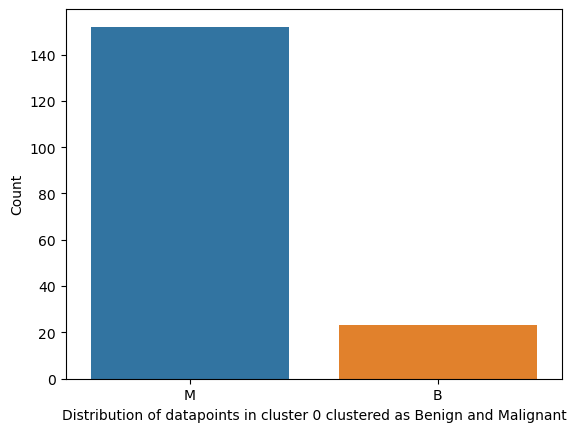

In [26]:
#countplot to study the disribution of datapoints in cluster 0 clustered as Malignant and Benign 
sns.countplot(x = df_new["cluster"]== 0, data = df_new["diagnosis"])
plt.xlabel('Distribution of datapoints in cluster 0 clustered as Benign and Malignant')
plt.ylabel('Count')


In [27]:
cluster_1 = df_new[df_new["cluster"]== 1]["diagnosis"].value_counts()

In [28]:
cluster_1

B    334
M     60
Name: diagnosis, dtype: int64

Text(0, 0.5, 'Count')

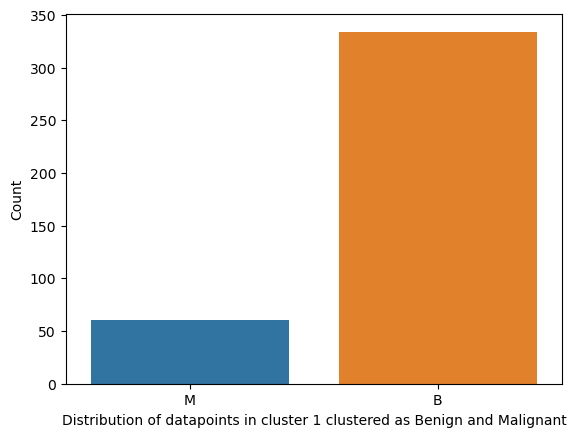

In [29]:
#countplot to study the disribution of datapoints in cluster 1 clustered as Malignant and Benign 
sns.countplot(x = df_new["cluster"]== 1, data = df_new["diagnosis"])
plt.xlabel('Distribution of datapoints in cluster 1 clustered as Benign and Malignant')
plt.ylabel('Count')


In [14]:
#compute silhouette score
#0.5706918347447564 -3
#0.572741013000558- 2
silhouette_score(X,X['cluster']) 


0.572741013000558

<Axes: xlabel='cluster'>

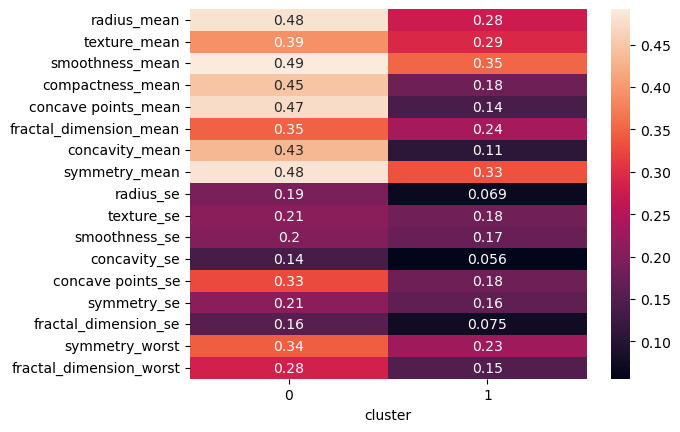

In [24]:
#Visualize the cluster
#Heatmap of all features with their corresponding clusters  

clusters = X.groupby("cluster").mean()
sns.heatmap(clusters.T, annot= True)